[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


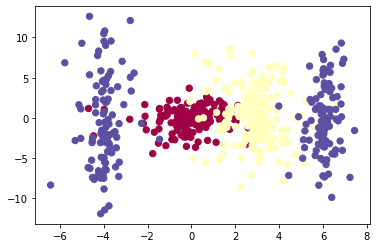

In [119]:
#Implementing a neural network with 1 hidden layer
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent


#Functions
#Functions to load
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """  
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# GRADED FUNCTION: forward_propagation. Trying to change to have 3 out nodes
def forward_propagation(X, parameters, pr = False):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    #print(W1.shape, b1.shape, W2.shape, b2.shape)
    
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    if(pr):
        print(A2)
    ### END CODE HERE ###
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
    

# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    
    # Retrieve W1 and W2 from parameters
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
    
    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1-A2))
    ### END CODE HERE ###
    cost = -1/m * np.sum(logprobs) 
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2= A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1 - np.power(A1, 2)))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 2000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    print(layer_sizes(X, Y))
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model false: 0 / true: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    #predictions = (A2 > 0.5)  # Vectorized
    #Want to return highest likelihood of 3 outputs instead. Array of highest first
    predictions = np.maximum(A2[0], A2[1])
    predictions = np.maximum(predictions, A2[2])
    for i in range(predictions.size):
        if(predictions[i] == A2[0][i]):
            predictions[i] = 0
        if(predictions[i] == A2[1][i]):
            predictions[i] = 1
        if(predictions[i] == A2[2][i]):
            predictions[i] = 2
    #predictions should now output the highest probability output node
    print(predictions)
    ### END CODE HERE ###
    print('preds')
    print(predictions)
    return predictions

def pdb(model, X, cols):
    # Set min and max values and give it some padding
    x_min, x_max = -20, 20
    y_min, y_max = -20, 20
    #The mesh increment size. The larger the size, the less detailed the graph.
    #eg if ymin = -10 and ymax = 10 and h = 5, only 20/5 = 4 cells across
    h = 0.01
    # Generate a grid of points with distance h between them. so for h = 2 will just
    #compute -10, -8, -6 ... 8, 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    arr = np.array([])

    
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z)
    #print(Z)
    #print(xx)
    print(model)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=cols.ravel(), cmap=plt.cm.Spectral)

#Choose dataset to run
X, Y = load_planar_dataset()
#colour1
x1 = np.arange(200).reshape(1, 200)*np.random.randn(1, 200)/100
#colour2
x11 = np.arange(200).reshape(1, 200)*np.random.randn(1, 200)/100+3
#colour3
zz1=np.arange(100).reshape(1, 100)*np.random.randn(1, 100)/100+6
zz2=np.arange(100).reshape(1, 100)*np.random.randn(1, 100)/100-4
zz = np.append(zz1, zz2).reshape(1, 200)

#Putting all colours together to make (1, 660) array
x1 = np.append(x1, x11)
x1 = np.append(x1, zz).reshape(1, 600)
#other coord for all 3
x2 = np.arange(600).reshape(1, 600)*np.random.randn(1, 600)/100
#Combining xpos and ypos coords to make (2, 600) array
X = np.append(x1, x2).reshape(2, 600)
#add extra colour indicators to y (2)
yfalse = np.zeros(200).reshape(1, 200)
ytrue = np.zeros(200).reshape(1, 200)+1
red = np.append(ytrue, yfalse).reshape(1, 400)
red = np.append(red, yfalse).reshape(1, 600)
blue = np.append(yfalse, ytrue).reshape(1, 400)
blue = np.append(blue, yfalse).reshape(1, 600)
green = np.append(yfalse, yfalse).reshape(1, 400)
green = np.append(green, ytrue).reshape(1, 600)

colOut = np.append(np.append(yfalse, ytrue).reshape(1, 400), np.zeros(200).reshape(1, 200)+2).reshape(1, 600)
Y = np.append(red, blue).reshape(2, 600)
Y = np.append(Y, green).reshape(3, 600)
print(Y)

plt.scatter(X[0, :], X[1, :], c=colOut[0, :], s=40, cmap=plt.cm.Spectral);

### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m =  Y.size # training set size
### END CODE HERE ###

(2, 4, 3)
Cost after iteration 0: 2.079374
Cost after iteration 500: 0.454297
Cost after iteration 1000: 0.399410
Cost after iteration 1500: 0.392380
{'W1': array([[ 0.66241161, -0.41410934],
       [-0.9585099 ,  0.0331963 ],
       [-2.02052543, -0.73687391],
       [ 1.57732805, -0.01191041],
       [-1.78864184,  0.08186065],
       [ 1.26404936,  0.09910074],
       [ 1.05405237, -0.11647417],
       [ 1.35500891, -0.04669907],
       [ 1.92735448,  0.19662264],
       [-0.91124421,  0.04872303]]), 'b1': array([[-1.75132526],
       [ 3.75036049],
       [ 5.04511819],
       [-7.07974028],
       [-4.66030765],
       [-0.18427134],
       [-5.50926673],
       [-6.14721783],
       [ 2.23724833],
       [ 4.13368972]]), 'W2': array([[-2.5360276 ,  0.07402804,  3.34243678,  0.1819119 , -2.87931844,
        -1.7522036 ,  0.29203699, -0.24869423,  1.60618645, -0.15110433],
       [ 2.28719051,  0.39230703, -2.75210099, -2.29055611, -0.09761807,
         1.94909811, -1.06420506, -1.

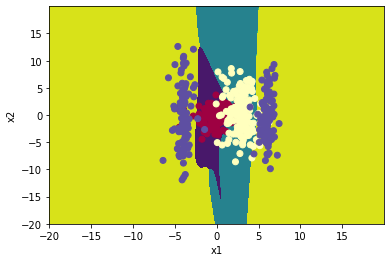

In [121]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 10, num_iterations = 2000, print_cost=True)
print(parameters)
# Plot the decision boundary
#plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
#plt.title("Decision Boundary for hidden layer size " + str(4))

pdb(lambda x: predict(parameters, x.T), X, colOut)
#predictions = predict(parameters, X)
#accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
#print ("Accuracy for hidden units: " + str(accuracy))

#print(parameters)
#For testing:   (-10, 0),   (0, 0),    (-10, -10), (0, -10)
#              [[0.00717294 0.94247714 0.00706151 0.00567033]]
#with weights and biases from print(parameters)
#The output is just a value based on what is passed throught the forward prop function. Vectorising
#it gives the 4 equations: Z1 = np.dot(W1, X) + b1,  A1 = np.tanh(Z1),    Z2 = np.dot(W2, A1) + b2,    A2 = sigmoid(Z2)
#trying to put it into a single function for the points above. Hopefully will return the same numbers.

#predicts the z value of a single inout passing through the network. >0.5 = 1, else 0 for network values
def print_Z_value(ww1, bb1, ww2, bb2, x, y):
    #put both input variables into array
    x = np.array([[x], [y]])
    zz1 = np.dot(ww1, x) + bb1
    aa1 = np.tanh(zz1)
    zz2 = np.dot(ww2, aa1) + bb2
    aa2 = sigmoid(zz2)
    
    #prints the computed result as a number. if > 0.5, can be comsidered yes, else no.
    #print(aa2)
    #computing in 1 line 
    #print(sigmoid(np.dot(ww2, (np.tanh(np.dot(ww1, x) + bb1))) + bb2))

print_Z_value(parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2'], -10, 0)
print_Z_value(parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2'], 0, 0)
print_Z_value(parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2'], -10, -10)
print_Z_value(parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2'], 0, -10)

#Should be the same as above one if done properly
#forward_propagation(np.array([[0], [-10]]), parameters, True)